# Деревья решений

In [1]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR

import matplotlib.pyplot as plt
import numpy as np

import time
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
def get_boston_dataset():
    """Return the splits of the Boston dataset for training and testing"""
    X, y = load_boston(return_X_y=True)
    return train_test_split(X, y, random_state=42)

X_train, X_test, y_train, y_test = get_boston_dataset()

**Данные**: датасет со стоимостью недвижимости в Бостоне  
**Цели**: В данном задании следует выполнить следующие пункты:

1. Обучить ``DecisionTreeRegressor`` на обучающей выборке, установив ``random_state=0``. Ограничить максимальную глубину дерева до 3, чтобы получившаяся визуализация не была слишком большой.
1. При помощи функции sklearn.tree.plot_tree визуализировать получившееся дерево. Можете передать load_boston().feature_names для улучшения визуализации. Для того чтобы визуализация выглядела лучше, можете воспользоваться аргументом fontsize, а также установить  ``plt.figure(figsize=(X,Y))``.
1. Взять любой объект из тестовой выборки. Предсказать его цену при помощи функции .predict обученного регрессора, а затем, воспользовавшись полученной визуализацией, опишите правила, по которым дерево сделало свой вывод. Опишите словами эти решения ниже.

[Text(418.5, 713.475, 'RM <= 6.941\nmse = 88.682\nsamples = 379\nvalue = 22.908'),
 Text(209.25, 509.625, 'LSTAT <= 14.4\nmse = 40.363\nsamples = 314\nvalue = 19.954'),
 Text(104.625, 305.775, 'DIS <= 1.385\nmse = 26.28\nsamples = 187\nvalue = 23.394'),
 Text(52.3125, 101.92499999999995, 'mse = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(156.9375, 101.92499999999995, 'mse = 14.927\nsamples = 183\nvalue = 22.933'),
 Text(313.875, 305.775, 'CRIM <= 7.084\nmse = 18.04\nsamples = 127\nvalue = 14.891'),
 Text(261.5625, 101.92499999999995, 'mse = 10.405\nsamples = 75\nvalue = 17.104'),
 Text(366.1875, 101.92499999999995, 'mse = 11.794\nsamples = 52\nvalue = 11.698'),
 Text(627.75, 509.625, 'RM <= 7.437\nmse = 76.4\nsamples = 65\nvalue = 37.175'),
 Text(523.125, 305.775, 'LSTAT <= 15.765\nmse = 39.248\nsamples = 40\nvalue = 32.383'),
 Text(470.8125, 101.92499999999995, 'mse = 22.076\nsamples = 38\nvalue = 33.345'),
 Text(575.4375, 101.92499999999995, 'mse = 13.69\nsamples = 2\nvalue = 14.1')

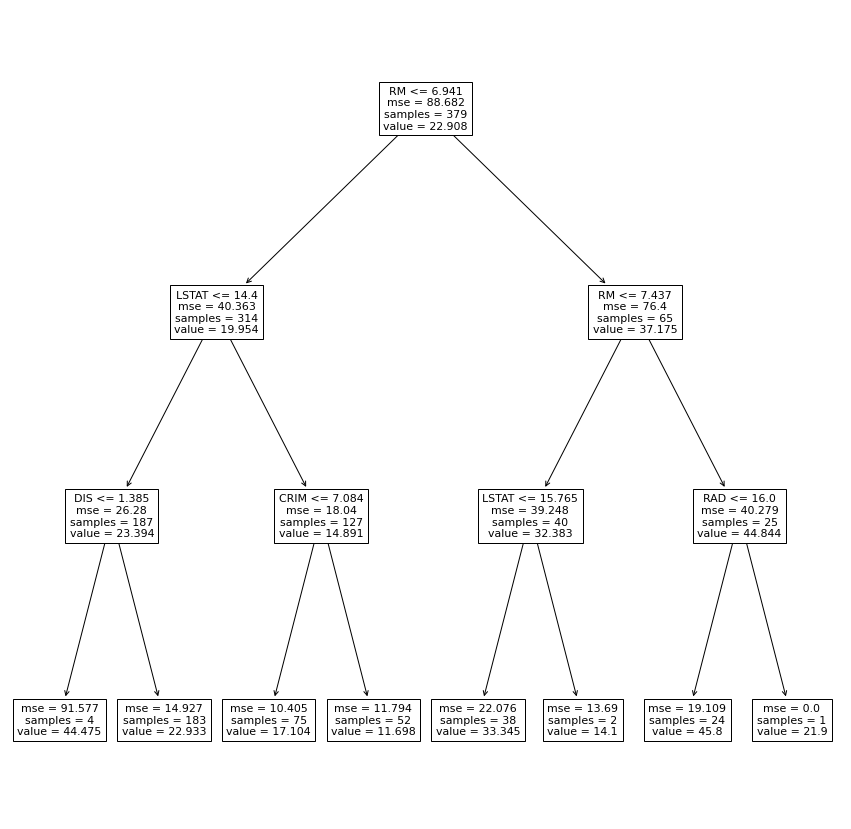

In [3]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=0)

decision_tree_regressor.fit(X_train, y_train)
plt.figure(figsize=(15, 15))
plot_tree(decision_tree_regressor, feature_names=load_boston().feature_names)

In [4]:
import pandas as pd
boston = load_boston()
df = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=list(boston['feature_names']) + ['target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
import random
n = 56
print("predicted value: {:.3f}".format(decision_tree_regressor.predict(X_test[n].reshape(1, -1))[0]))
print("target: {:.3f}".format(y_test[n]))
print("feature names: {}".format(boston.feature_names))
print("features: \n{}".format(np.round(X_test[n], 3)))

predicted value: 17.104
target: 18.400
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
features: 
[  5.666   0.     18.1     0.      0.74    6.219 100.      2.005  24.
 666.     20.2   395.69   16.59 ]


**Ответ на вопрос (о том как предсказывается значение на объекте):** Сначала обученная модель смотрит на признак 'RM', который в нашем случае 6.219, а 6.219 <= 6.941, поэтому идем в левый лист дерева. Далее рассматривается признак 'LSTAT', который равен 16.59, но не удовлетворяет неравенству <= 14.4, поэтому идем в правый лист. В нем мы проверяем неравенство 'CRIM' <= 7.084. В нашем случае 'CRIM' = 5.666, поэтому идем в левый лист, а отсюда уже наш алгоритм дает окончательный ответ.

## Ансамбли решений

**Данные**: датасет со стоимостью недвижимости в Бостоне  
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Обучить 3 дерева решений, для каждого при инициализации установить `random_state` равный 1, 2 и 3. В этот раз ограничивать глубину деревьев не нужно.
1. Получить предсказание для тестовой выборки от каждого регрессора, а также получить ``усреднённое`` предсказание.
1. Посчитать MAE для каждого из деревьев, полученных в первом пункте, а также для усреднённых предсказаний. Сделать вывод о том, стало лучше или нет.

In [6]:
dtr_1 = DecisionTreeRegressor(random_state=1)
dtr_2 = DecisionTreeRegressor(random_state=2)
dtr_3 = DecisionTreeRegressor(random_state=3)
dtr_1.fit(X_train, y_train)
dtr_2.fit(X_train, y_train)
dtr_3.fit(X_train, y_train)
pred_1 = dtr_1.predict(X_test)
pred_2 = dtr_2.predict(X_test)
pred_3 = dtr_3.predict(X_test)
pred_mean = (pred_1 + pred_2 + pred_3) / 3
print("First prediction: MAE = {:.4f}".format(mean_absolute_error(pred_1, y_test)))
print("Second prediction: MAE = {:.4f}".format(mean_absolute_error(pred_2, y_test)))
print("Third prediction: MAE = {:.4f}".format(mean_absolute_error(pred_3, y_test)))
print("Mean prediction: MAE = {:.4f}".format(mean_absolute_error(pred_mean, y_test)))
print("При использовании Ансамбля деревьев результат улучшился, по сравнению с использованием одного дерева решений")

First prediction: MAE = 2.6260
Second prediction: MAE = 2.7055
Third prediction: MAE = 2.6126
Mean prediction: MAE = 2.5105
При использовании Ансамбля деревьев результат улучшился, по сравнению с использованием одного дерева решений


### Задание 2.2 (кросс-проверка, 1 балл)
**Данные**: датасет со стоимостью недвижимости в Бостоне  
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  

1. Обучить RandomForestRegressor. Для честности следует установить ``n_estimators=3``, то есть сделать число деревьев равным 3 (как мы сделали в предыдущем задании). Для однородности также поставьте ``random_state = 0``
1. Посчитать MAE полученных предсказаний. Сравнить их с результатами, полученными в предыдущем пункте. Сделайте вывод.

In [7]:
rfr = RandomForestRegressor(n_estimators=3, random_state=0)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
print("MAE = {:.4f}".format(mean_absolute_error(pred, y_test)))

MAE = 2.5585


**Вывод по результату**: Можно сказать, что получили почти такой же результат. Использование рандомной подвыборки для обучения каждого дерева в случайном лесу не дало прироста.

## Переобучение и зависимость предсказаний от числа деревьев

**Данные**: датасет со стоимостью недвижимости в Бостоне   
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Обучите 10 случайных лесов, установив random_state=42 и замерив время, потраченное на обучение. Для обучаемых лесов, используйте число деревьев (`n_estimators`) из `np.logspace(1, 4, num=10)` (округлите значения вниз до целых чисел). Таким образом мы получим оценку результата для лесов, построенных с различным числом деревьев.
1. Для всех 10 лесов посчитайте MAE на тренировочном и тестовом множествах.
1. Постройте график для отображения зависимости времени обучения от числа деревьев в лесу. Вдоль оси Ox отложите число деревьев, участвующих в обучении. На оси Oy отложите время, потраченное на обучение.
1. Постройте график для отображения зависимости значения MAE от числа деревьев в лесу. Вдоль оси Ox отложите число деревьев, участвующих в обучении. На оси Oy отложите одним цветом значение MAE на тренировочном множестве, другим цветом MAE на тестовом множестве.
1. Проанализируйте результаты и графики, сделайте выводы про время обучения при различном числе деревьев и про качество результатов (в частности - переобучение)

In [8]:
import time
n_estimators = np.floor(np.logspace(1, 4, num=10)).astype(np.int32)
t = []
MAE_train = []
MAE_test = []
for n in n_estimators:
    rfr = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=8)
    start_time = time.time()
    rfr.fit(X_train, y_train)
    end_time = time.time()
    t.append(end_time - start_time)
    pred_test = rfr.predict(X_test)
    pred_train = rfr.predict(X_train)
    MAE_test.append(mean_absolute_error(pred_test, y_test))
    MAE_train.append(mean_absolute_error(pred_train, y_train)) 
    print("ok. n_estimators = {}".format(n))

ok. n_estimators = 10
ok. n_estimators = 21
ok. n_estimators = 46
ok. n_estimators = 100
ok. n_estimators = 215
ok. n_estimators = 464
ok. n_estimators = 1000
ok. n_estimators = 2154
ok. n_estimators = 4641
ok. n_estimators = 10000


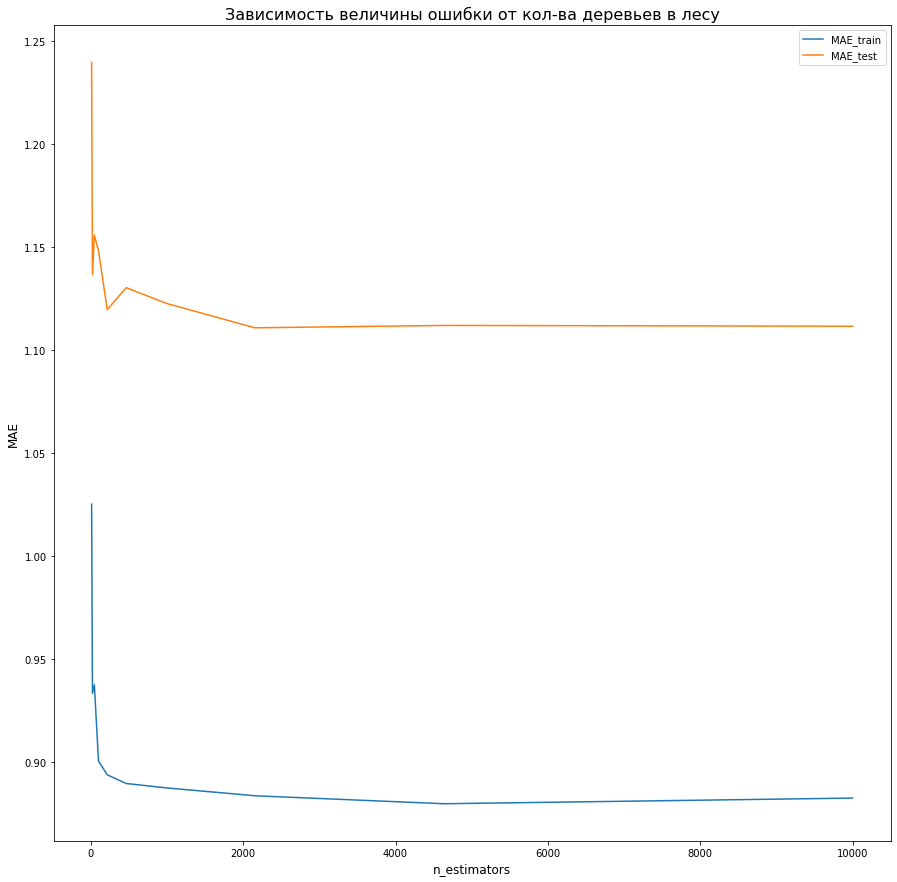

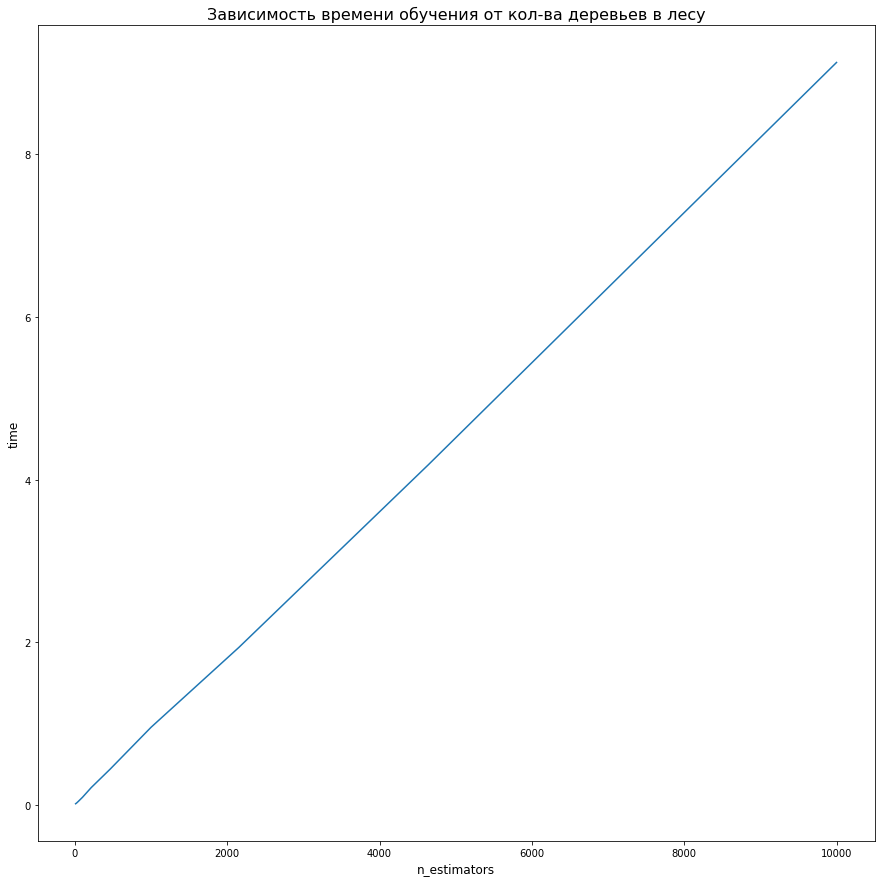

In [9]:
plt.figure(figsize=(15, 15))
plt.title("Зависимость величины ошибки от кол-ва деревьев в лесу", fontsize=16)
plt.plot(n_estimators, MAE_train)
plt.plot(n_estimators, np.array(MAE_test) - 1) ##вычитаю единицу из значений MAE для наглялности результатов
plt.legend(['MAE_train', 'MAE_test'])
plt.ylabel("MAE", fontsize=12)
plt.xlabel("n_estimators", fontsize=12)
plt.show()

plt.figure(figsize=(15, 15))
plt.title("Зависимость времени обучения от кол-ва деревьев в лесу", fontsize=16)
plt.plot(n_estimators, t)
plt.ylabel("time", fontsize=12)
plt.xlabel("n_estimators", fontsize=12)
plt.show()

**Выводы**: Время обучения линейно возрастает при увеличении кол-ва деревьев. Лучший результат на тесте при кол-ве деревьев = 2154, далее наблюдается переобучение.

**Данные**: датасет со стоимостью недвижимости в Бостоне   
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  

1. Создайте случайный лес со следующими параметрами: n_estimators = 1000, warm_start = True, random_state=42
2. Обучите полученный лес, засекая время, потраченное на обучение, и измерив качество предсказания на тесте по MAE
3. Увеличьте число деревьев в лесу. Для этого увеличьте число n_estimators на 1000.
4. Воспользуйтесь методом fit, чтобы дообучить новые деревья. Не забудьте замерить время и качество!
5. Повторяйте два предыдущих шага до тех пор, пока вы не оцените лес с 10000 деревьями.
6. Постройте графики качества и времени от количества деревьев (время считайте отдельно для каждого дообучения, без учета затрат на предыдущие итерации)
7. Проанализируйте результаты и графики, сделайте выводы про время обучения и качество, сравните с результатом из предыдущего пункта

In [10]:
t = []
MAE_test = []
rfr = RandomForestRegressor(n_estimators = 1000, warm_start = True, random_state=42, n_jobs=8)
while rfr.n_estimators <= 10000:
    start_time = time.time()
    rfr.fit(X_train, y_train)
    end_time = time.time()
    t.append(end_time - start_time)
    pred_test = rfr.predict(X_test)
    MAE_test.append(mean_absolute_error(pred_test, y_test)) 
    print("ok. n_estimators = {}".format(rfr.n_estimators))
    rfr.n_estimators += 1000

ok. n_estimators = 1000
ok. n_estimators = 2000
ok. n_estimators = 3000
ok. n_estimators = 4000
ok. n_estimators = 5000
ok. n_estimators = 6000
ok. n_estimators = 7000
ok. n_estimators = 8000
ok. n_estimators = 9000
ok. n_estimators = 10000


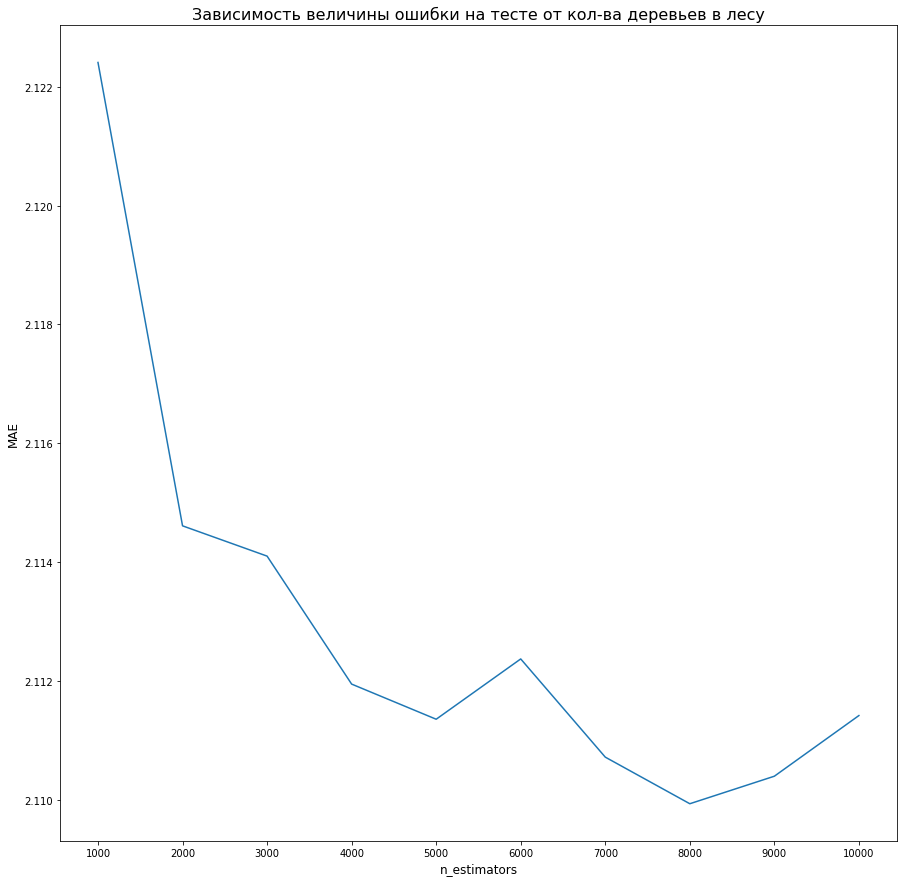

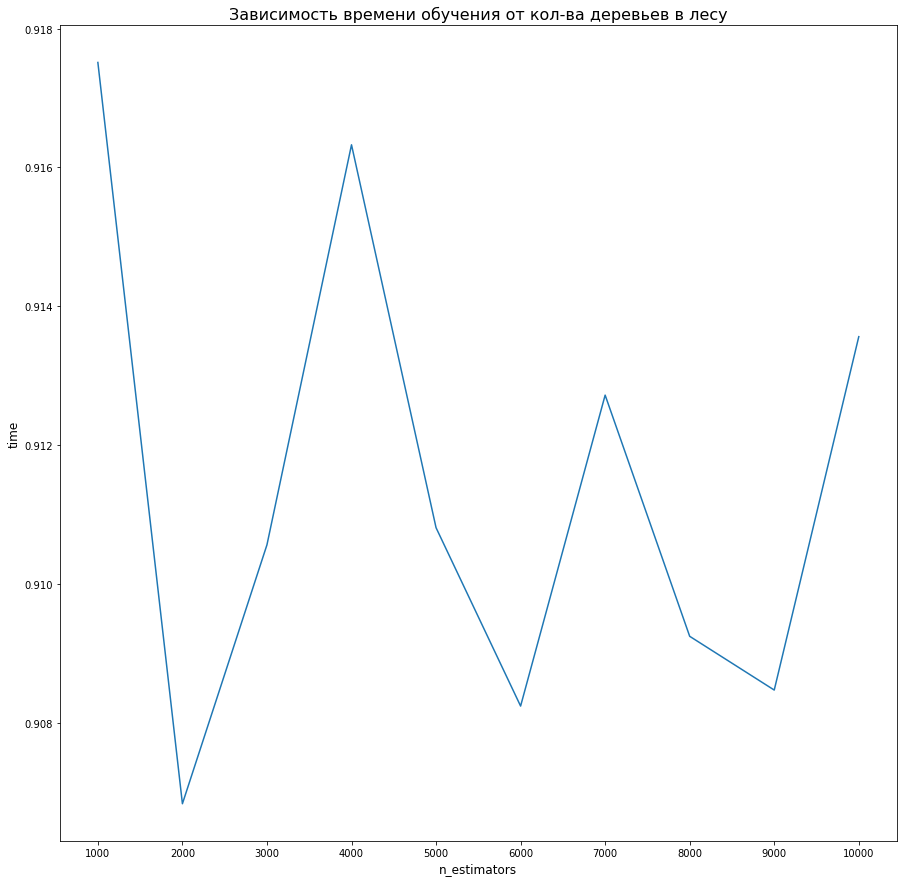

In [11]:
x = np.array([x for x in range(10)])
n_estimators = np.array([x for x in range(1000, 10001, 1000)])

plt.figure(figsize=(15, 15))
plt.title("Зависимость величины ошибки на тесте от кол-ва деревьев в лесу", fontsize=16)
plt.plot(x, MAE_test)
plt.xticks(x, n_estimators)
plt.ylabel("MAE", fontsize=12)
plt.xlabel("n_estimators", fontsize=12)
plt.show()

plt.figure(figsize=(15, 15))
plt.title("Зависимость времени обучения от кол-ва деревьев в лесу", fontsize=16)
plt.plot(x, t)
plt.xticks(x, n_estimators)
plt.ylabel("time", fontsize=12)
plt.xlabel("n_estimators", fontsize=12)
plt.show()

**Выводы**: Время обучения примерно равно константе(0.899 - 0.955), а, следовательно, не зависит от кол-ва деревьев. Лучший результат MAE на тесте при 8000 деревьев, далее можем наблюдать переобучение.


## Важность признаков

1. Скачайте архив `Публичные тесты` по ссылке в README.md и разархивируйте его в любом удобном для вас месте.
2. Найдите переменную `path_to_dataset`, расположенную на первой строке следующей ячейки, и измените её значение на полный путь до папки `[ПАПКА_ИЗВЛЕЧЕНИЯ]/public_tests/01_test_potentials_input/train/potentials`

С этого момента мы изменим датасет и попытаемся поиграться с физикой: возьмем коллекцию различных потенциалов и для них будем предсказывать некоторую физическую величину. Обученные физики говорят, что эта величина зависит от формы и глубины потенциала, а значит и мы можем тут чему-то научиться. Ранее эту задачу пытались решить с помощью сверточных нейронных сетей. А получится ли это у нас с помощью деревьев?

Загрузим датасет и посмотрим как он выглядит:

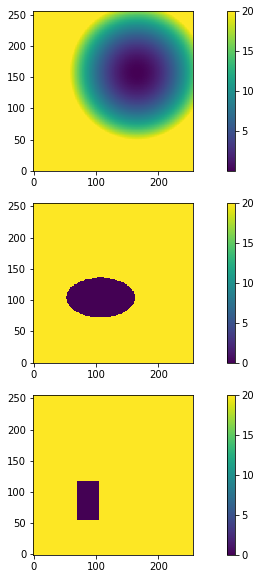

In [12]:
path_to_dataset = "potential/public_tests/01_test_potentials_input/train/potentials"

chosen_ones = {'b2399918793e4228a3ea0a0a89adf11b.npz', '513d5523d14c47feb8b544138071c496.npz', 'ca9f96c404b740e3b28f583f9d9afbf8.npz'}

plt.figure(figsize=(12, 10))

def get_potential_dataset():

    global path_to_dataset

    """Return the training and testing splits of the potential dataset"""
    X, y = [], []

    plot_index = 1

    if not path_to_dataset.endswith("/"):
        path_to_dataset += "/"

    for f in os.listdir(path_to_dataset):

        npz = np.load(f'{path_to_dataset}{f}')
        data, target = npz['data'], npz['target']

        X.append(data)
        y.append(target)

        if f in chosen_ones:
            plt.subplot(len(chosen_ones), 1, plot_index)
            plt.imshow(data, origin="lower", interpolation='none')
            plt.colorbar()
            plot_index += 1
    plt.show()
    return train_test_split(np.array(X), np.array(y), random_state=42)

X_train, X_test, y_train, y_test = get_potential_dataset()



Можно увидеть, что у нас имеется три типа потенциалов: два с бесконечно крутыми стенками, квадратный и эллиптический (их значение резко меняется на 0) и гармонический (красивый круглый, он плавно спускается к своему минимуму). В местах, где потенциала нет, значение матрицы равно 20.

Видно одну проблему: картинки квадратные (каждое изображение `256 х 256`), а большинство методов машинного обучение работает с векторами-признаками, и нам придется с этим позже разобраться. И еще более крупная проблема: потенциалы находятся в "случайных" местах рисунка. Возможно, позже нам придется с этим разобраться. Но вернёмся к нашим баранам. У линейных регрессоров есть одно очень полезное свойство: после обучения мы ``из коробки`` получаем важность признаков: чем выше коэффициент (или абсолютное его значение), стоящий у соответствующего признака, тем он важнее. Деревья решений не обладают столь же ``естественной`` оценкой важности признаков, однако мы всё равно можем её оценить. Называется эта оценка критерием Джини: она вычисляет то, как начинают ``ошибаться`` предсказания регрессора, если исключить данный признак. Чем сильнее ошибка, тем важнее признак. К нашей радости, sklearn так же ``из коробки`` включает данные оценки признаков. Давайте попробуем воспользоваться этой функцией и посмотреть на важность признаков.

**Данные**: потенциалы  
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Воспользоваться классом PotentialTransformer для преобразования двумерной матрицы в одномерный вектор
2. Воспользоваться классом Pipeline, чтобы "объединить" трансформатор и обучаемый метод
3. Обучить LinearSVR из sklearn на этом датасете.
4. Обучить RandomForestRegressor из sklearn на этом датасете.
5. Извлеките важность признаков из обученного леса с помощью `feature_importances_`. Извлеките также коэффициенты svm через coef_ (брать абсолютные значения необязательно).
6. Преобразуйте одномерный вектор важностей признаков в двумерную картинку таким образом, чтобы их можно было сравнивать с исходными потенциалами. Постройте рисунки важностей признаков с помощью plt.imshow. Добавьте легенду.
7. Оцените качество предсказаний через метод .predict.
8. Проанализируйте результаты. Можно ли сказать что у обоих методов получились одинаковые важности признаков? Можно ли сказать, что важность признаков отображает структуру потенциалов?

In [13]:
class PotentialTransformer:
    """
    A potential transformer.

    This class is used to convert the potential's 2d matrix to 1d vector of features.
    """

    def fit(self, x, y):
        """
        Build the transformer on the training set.
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: trained transformer
        """
        return self

    def fit_transform(self, x, y):
        """
        Build the transformer on the training set and return the transformed dataset (1d vectors).
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: transformed potentials (list of 1d vectors)
        """
        return self.transform(x)

    def transform(self, x):
        """
        Transform the list of potential's 2d matrices with the trained transformer.
        :param x: list of potential's 2d matrices
        :return: transformed potentials (list of 1d vectors)
        """
        return x.reshape((x.shape[0], -1))

svm = Pipeline([('vectorizer', PotentialTransformer()), ('svm', LinearSVR(random_state=0))])
rfr = Pipeline([('vectorizer', PotentialTransformer()), ('decision_tree', RandomForestRegressor(random_state=0))])
rfr.fit(X_train, y_train)
svm.fit(X_train, y_train)
importance_rfr = rfr['decision_tree'].feature_importances_.reshape(256, 256)
importance_svm = svm['svm'].coef_.reshape(256, 256)

/home/se_tru/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


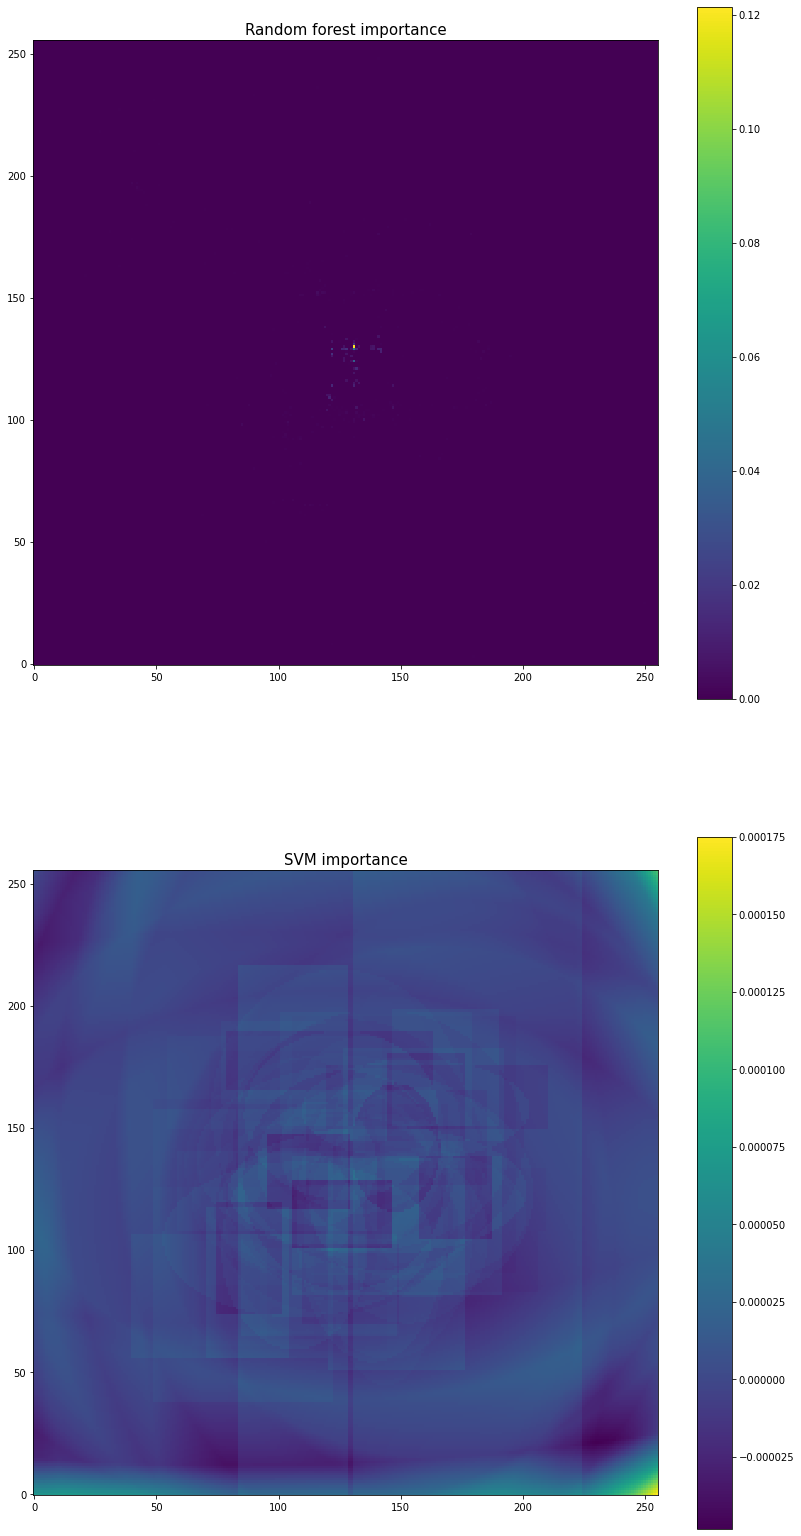

In [14]:
plt.figure(figsize=(14,28))
plt.subplot(2, 1, 1)
plt.title('Random forest importance', fontsize=15)
plt.imshow(importance_rfr, origin="lower", interpolation='none')
plt.colorbar()
plt.subplot(2, 1, 2)
plt.title('SVM importance', fontsize=15)
plt.imshow(importance_svm, origin="lower", interpolation='none')
plt.colorbar()
plt.show()

In [15]:
pred_rfr = rfr.predict(X_test)
pred_svm = svm.predict(X_test)

print("SVM error: MAE = {:.4f}".format(mean_absolute_error(pred_svm, y_test)))
print("Random Forest error: MAE = {:.4f}".format(mean_absolute_error(pred_rfr, y_test)))

SVM error: MAE = 0.0925
Random Forest error: MAE = 0.0597


**Выводы**: У метода SVM и метода RandomForest получились совершенно разные важности признаков, но у случайного леса в важности признаков не наблюдается никаких закономерностей, связанных с формой потенциалов, в то время как у SVM важность признаков отображает структуру потенциалов.


**Данные**: потенциалы  
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Улучшить метод PotentialTransformer, чтобы "стандартизировать" данные (к примеру, переносить потенциалы в одно и то же место)
2. Воспользоваться классом Pipeline, чтобы "объединить" трансформатор и обучаемый метод
3. Обучить лучшие деревья на диком западе (можно воспользоваться любой реализацией лесов из sklearn).
4. Отобразить важность признаков получившегося дерева/леса
5. Загрузить решение в тестирующую систему

(112, 256, 256) (38, 256, 256)
(112,) (38,)


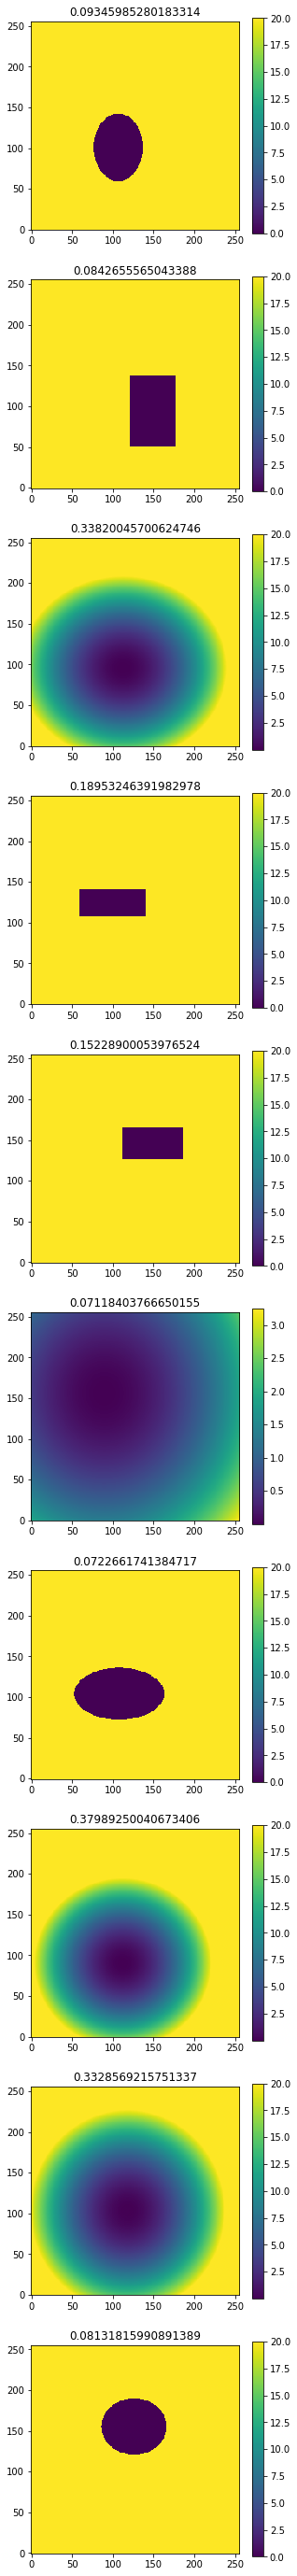

In [16]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

chosen_ones = np.random.randint(0, len(X_train), size=10)
plot_index = 1

plt.figure(figsize=(5, 50))
for idx in chosen_ones:
    plt.subplot(len(chosen_ones), 1, plot_index)
    plt.title(y_train[idx])
    plt.imshow(X_train[idx], origin="lower", interpolation='none')
    plt.colorbar()
    plot_index += 1
plt.show()

По структуре данных можно заметить, что потенциалы эллиптического типа являются эллиптическими параболоидами и задаются формулой: $$p = ax^2 + by^2$$
Для потенциалов с бесконечно крутыми стенками можно протсо задать коэффициенты a и b равными нулю, т.е. p = 0. Квадратный потенциал будем помечать меткой "1", а потенциалы эллиптического типа - "0". Осталось еще два признака: размеры потенциалов по оси X и по оси Y, считая от центра потенциала.
В итоге мы свели признаковое пространства размера (256 * 256) к признаковому пространству размерности 5!

In [17]:
class PotentialTransformer:
    """
    A potential transformer.

    This class is used to convert the potential's 2d matrix to 1d vector of features.
    """

    def fit(self, x, y):
        """
        Build the transformer on the training set.
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: trained transformer
        """
        return self

    def fit_transform(self, x, y):
        """
        Build the transformer on the training set and return the transformed dataset (1d vectors).
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: transformed potentials (list of 1d vectors)
        """
        return self.transform(x)

    def transform(self, x):
        """
        Transform the list of potential's 2d matrices with the trained transformer.
        :param x: list of potential's 2d matrices
        :return: transformed potentials (list of 1d vectors)
        """
        X_transformed = np.zeros((len(x), 5))
        for i, arr in enumerate(x):
            features = []
            if len(np.unique(arr)) == 2:
                features.append(0)
                features.append(0)
                mask = np.where(arr < 20, 1, 0)
                mask_x = np.sum(mask, axis=0)
                mask_y = np.sum(mask, axis=1)
                if len(np.unique(mask_x)) == 2:
                    features.append(1)
                else:
                    features.append(0)
                features.append(np.max(mask_x) / 2)
                features.append(np.max(mask_y) / 2)
            else:
                idx_min = np.unravel_index(np.argmin(arr), (256, 256))
                func_y = arr[idx_min[0], :idx_min[1]]
                func_x = arr[:idx_min[0], idx_min[1]]
                mask_y = np.where(func_y < 20.0, 0, 1)
                mask_x = np.where(func_x < 20.0, 0, 1)
                idx_y = np.sum(mask_y)
                idx_x = np.sum(mask_x)
                features.append((func_x[idx_x] / (idx_x - idx_min[0])**2))
                features.append((func_y[idx_y] / (idx_y - idx_min[1])**2))
                features.append(0)
                features.append(np.sqrt(20 / features[0]))
                features.append(np.sqrt(20 / features[1]))
            X_transformed[i] = np.array(features)
        return X_transformed

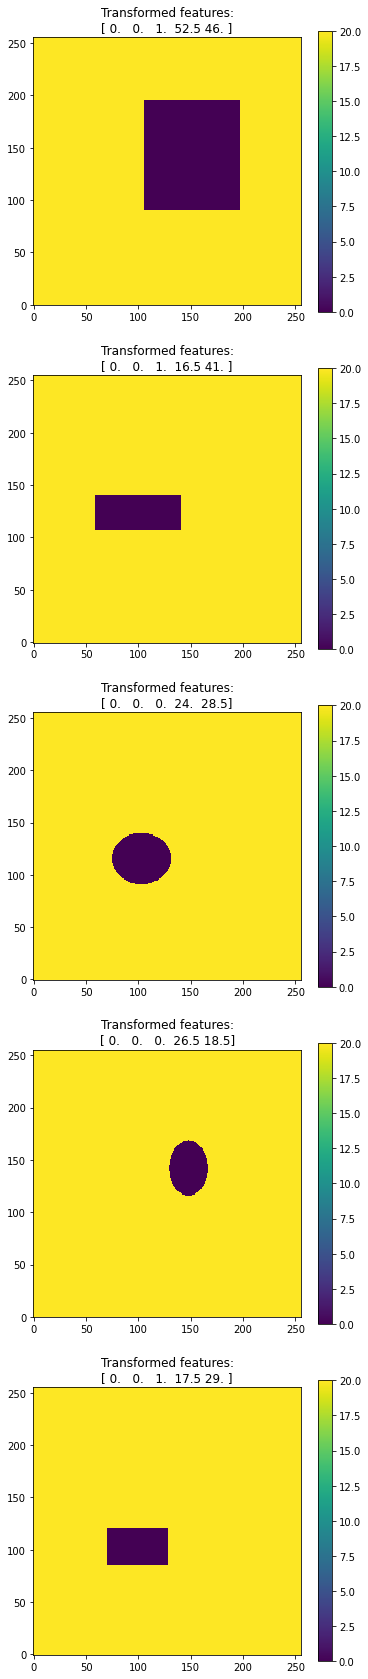

In [18]:
pt = PotentialTransformer()
X_transformed = pt.transform(X_train)
chosen_ones = np.random.randint(0, len(X_train), size=5)
plot_index = 1

plt.figure(figsize=(6, 30))
for idx in chosen_ones:
    plt.subplot(len(chosen_ones), 1, plot_index)
    plt.title("Transformed features:\n{}".format(X_transformed[idx]))
    plt.imshow(X_train[idx], origin="lower", interpolation='none')
    plt.colorbar()
    plot_index += 1
plt.show()

### При сравнении различных алгоритмов, основанных на деревьях решений, остановился на ExtraTreesRegressor, так как он дает наилучший результат на тесте

MAE on test = 0.0113
MAE on train = 0.0000


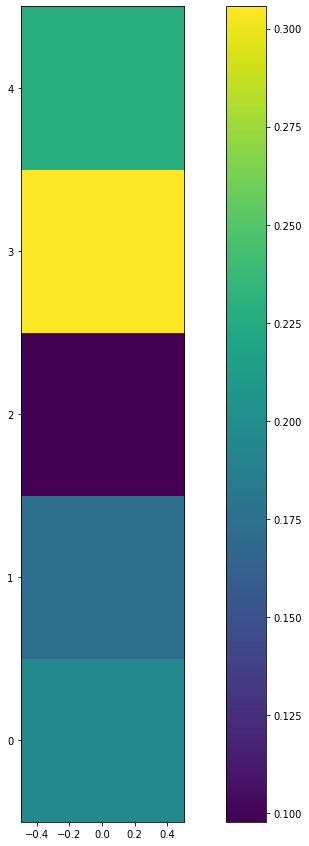

In [19]:
regressor = Pipeline([('vectorizer', PotentialTransformer()), ('decision_tree', ExtraTreesRegressor(random_state=1, criterion="mae"))])
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
print("MAE on test = {:.4f}".format(mean_absolute_error(pred, y_test)))
pred = regressor.predict(X_train)
print("MAE on train = {:.4f}".format(mean_absolute_error(pred, y_train)))
importance_rfr = regressor['decision_tree'].feature_importances_.reshape(5, 1)
plt.figure(figsize=(15, 15))
plt.imshow(importance_rfr, origin="lower", interpolation='none')
plt.colorbar()

### Теперь обучим лучшую модель на всей выборке  train и узнаем результаты на данных из папки test
Найдите переменные train_dir, test_dir и target_file, расположенные в первых следующих ячейках, и измените их значение на полный путь до папок:
1.[ПАПКА_ИЗВЛЕЧЕНИЯ]/public_tests/01_test_potentials_input/train/potentials

2.[ПАПКА_ИЗВЛЕЧЕНИЯ]/public_tests/01_test_potentials_input/test/potentials

3.[ПАПКА_ИЗВЛЕЧЕНИЯ]/public_tests/01_test_potentials_input/test/potentials

In [20]:
import json

train_dir = 'potential/public_tests/01_test_potentials_input/train/potentials'
test_dir = 'potential/public_tests/01_test_potentials_input/test/potentials'
target_file = 'potential/public_tests/01_test_potentials_gt/target.json'
targets = json.load(open(target_file))

X, Y = [], []
for file in os.listdir(train_dir):
    potential = np.load(os.path.join(train_dir, file))
    X.append(potential["data"])
    Y.append(potential["target"])
X_train, Y_train = np.array(X), np.array(Y)

X, Y = [], []
for file in os.listdir(test_dir):
    potential = np.load(os.path.join(test_dir, file))
    X.append(potential["data"])    
    Y.append(targets[file])
X_test, Y_test = np.array(X), np.array(Y)


regressor = Pipeline([('vectorizer', PotentialTransformer()), ('decision_tree', ExtraTreesRegressor(random_state=1, criterion='mae'))])
start_time = time.time()
regressor.fit(X_train, Y_train)
end_time = time.time()
predictions = regressor.predict(X_test)
print('Время обучения: {:.4f}'.format(end_time - start_time))
print("MAE on test = {:.4f}".format(mean_absolute_error(predictions, Y_test)))

Время обучения: 0.3568
MAE on test = 0.0043


**Вывод:** Получили довольно хороший результат и при этом очень высокую скорость обучения, за счет уменьшения размерности признакового пространства!